In [47]:
import numpy as np
import pandas as pd
import dabest
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
my_color_palette =  {'Dz 5mg/kg':'#8FB996','NaCl':'#594157', 'PTZ 20mg/kg':'#c7991a'}

In [49]:
Passive_metric_df = pd.read_pickle('Mice_data/'+'Passive_metrics_df')
cnd_order = ['NaCl','PTZ 20mg/kg','Dz 5mg/kg']

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dabest/plotter.py:389: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  rawdata_plot = sns.swarmplot(data=plot_data, x=xvar, y=yvar,


  control         test  control_N  test_N      effect_size  is_paired  \
0    NaCl  PTZ 20mg/kg         43      25  mean difference      False   
1    NaCl    Dz 5mg/kg         43      41  mean difference      False   

   difference  ci   bca_low  bca_high  pvalue_permutation  pvalue_welch  \
0    0.141591  95  0.050776  0.279548              0.0002      0.019713   
1   -0.099995  95 -0.138024 -0.051525              0.0000      0.000057   

   statistic_welch  pvalue_students_t  statistic_students_t  \
0        -2.498658           0.001586             -3.294981   
1         4.501415           0.000015              4.611270   

   pvalue_mann_whitney  statistic_mann_whitney  
0         6.815153e-04                   301.0  
1         3.024030e-09                  1505.0  


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dabest/plotter.py:438: UserWarning: FixedFormatter should only be used together with FixedLocator
  rawdata_axes.set_xticklabels(ticks_with_counts)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 18.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


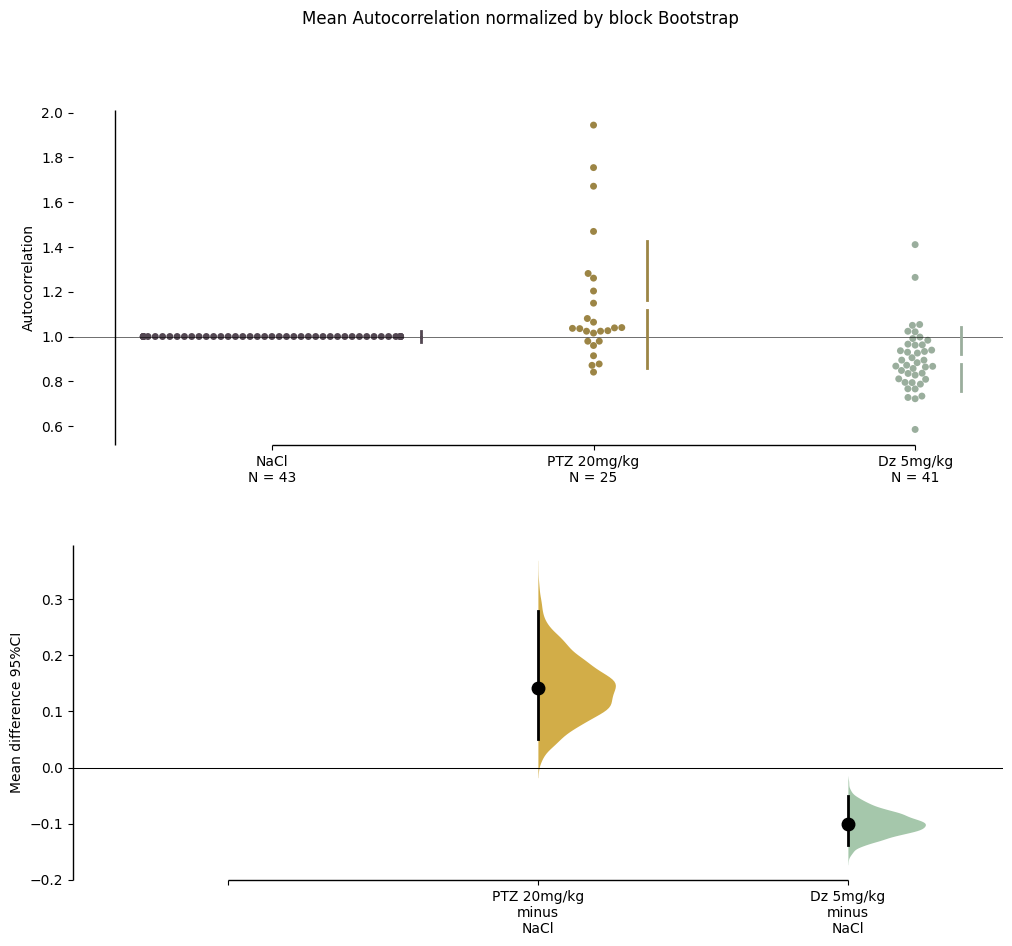

In [50]:
metrics = ['Autocorrelation','Variance','Skewness','Sum LL']
metric = 'Autocorrelation'

title = 'Mean '+ metric+' normalized by block Bootstrap '
fig2 = plt.figure(title, figsize=(12, 10)).suptitle(title)
ax1 = plt.subplot2grid((12, 12), (0, 0), rowspan=12, colspan=12)
ax1.axhline(y=1, color='k',  linewidth=0.5, alpha=0.8)
mulit_groupe = dabest.load(Passive_metric_df, idx= cnd_order, x="Condition", y='Normalized '+metric)
mulit_groupe.mean_diff.plot(ax=ax1,raw_marker_size=5,swarm_label=metric,contrast_label="Mean difference 95%CI",custom_palette=my_color_palette)

stat_1 = mulit_groupe.mean_diff.statistical_tests
print(stat_1)